Import are needed packages.

In [18]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np 
from shapely.geometry import Point,Polygon
import descartes

Read are file as a pandas dataframe.

In [2]:
df = pd.read_csv('data/kc_house_data.csv')

Change the into a GeoPandas dataframe, so we can get are geometry columns set up for are map.

In [3]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.long, df.lat))
gdf.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,geometry
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,POINT (-122.25700 47.51120)
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,POINT (-122.31900 47.72100)
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,POINT (-122.23300 47.73790)
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,POINT (-122.39300 47.52080)
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,POINT (-122.04500 47.61680)


Now we are load are shape file so we can get a look at are map.

In [4]:
kings_county = gpd.read_file('data/School_Districts_in_King_County___schdst_area.shp')

Now we just plot out are map.

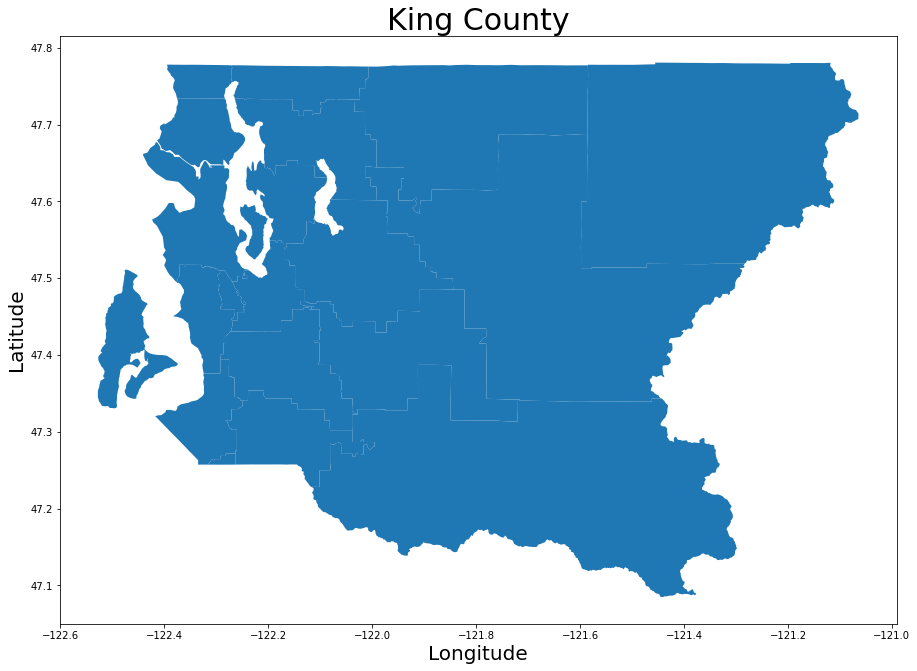

In [5]:
fig, ax = plt.subplots(figsize = (15,15))
kings_county.plot(ax=ax)
ax.set_title('King County',fontdict = {'fontsize': 30})
ax.set_ylabel('Latitude',fontdict = {'fontsize': 20})
ax.set_xlabel('Longitude',fontdict = {'fontsize': 20});

Now we are going to set up are data points for are map. I did that by initiating my coordinate system and creating applicable points using the latitude and longitude of my houses.

In [6]:
crs = {'init': 'epsg:4326'}
geometry = [Point(x,y) for x,y in zip(df.long,df.lat)]

Now to make a new dataframe for are first one and add are longitude and latitude for are house to it.

In [8]:
geo_df = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)

C:\Users\drago\anaconda3\envs\phase_2_project\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


Are first plot shows are house that are over $750k.

Text(0.5, 585.2306512934265, 'Longitude')

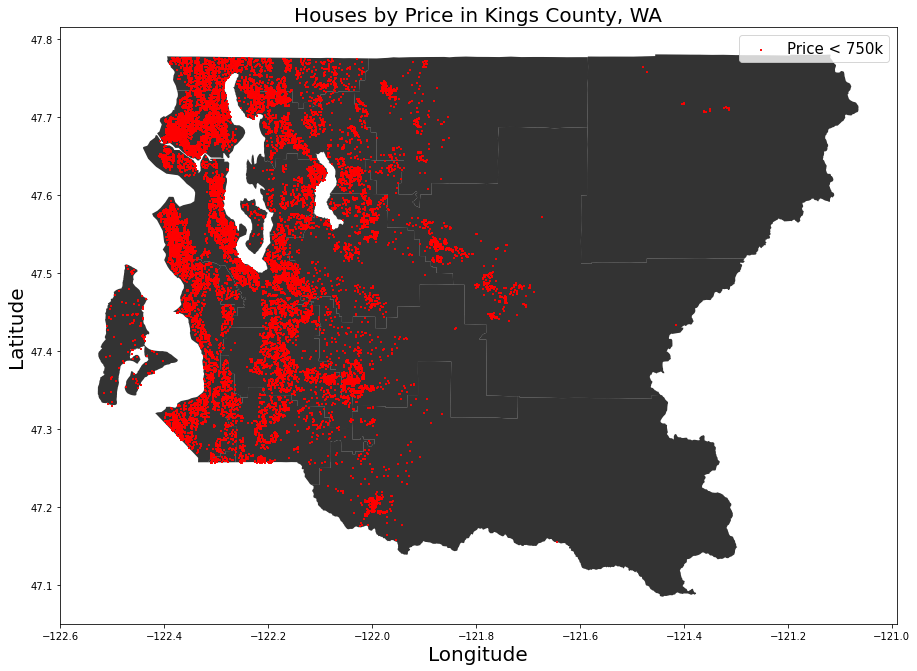

In [15]:
fig, ax = plt.subplots(figsize = (15,25))
kings_county.plot(ax=ax, alpha = 0.8, color = 'black')
geo_df[geo_df['price'] < 750000].plot(ax = ax , markersize = 1, color = 'red',marker = 's',label = 'Price < 750k', aspect = 1.5)
plt.legend(prop = {'size':15} )
ax.set_title('Houses by Price in Kings County, WA', fontdict = {'fontsize': 20})
ax.set_ylabel('Latitude',fontdict = {'fontsize': 20})
ax.set_xlabel('Longitude',fontdict = {'fontsize': 20})

This next one shows house that are less then are equal to $750k.

Text(0.5, 585.2306512934265, 'Longitude')

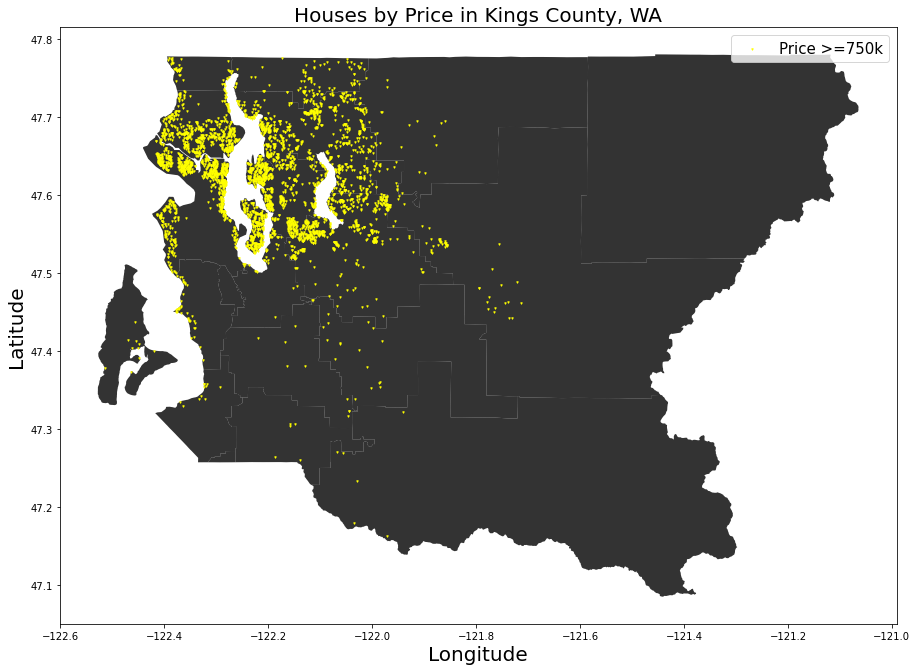

In [11]:
fig, ax = plt.subplots(figsize = (15,25))
kings_county.plot(ax=ax, alpha = 0.8, color = 'black')
geo_df[geo_df['price'] >= 750000].plot(ax = ax , markersize = 2,color = 'yellow',marker = 'v',label = 'Price >=750k', aspect = 1.5)
plt.legend(prop = {'size':15})
ax.set_title('Houses by Price in Kings County, WA', fontdict ={'fontsize': 20})
ax.set_ylabel('Latitude',fontdict = {'fontsize': 20})
ax.set_xlabel('Longitude',fontdict = {'fontsize': 20})

Lets do one more but this time, combineing both plots into one.

Text(0.5, 585.2306512934265, 'Longitude')

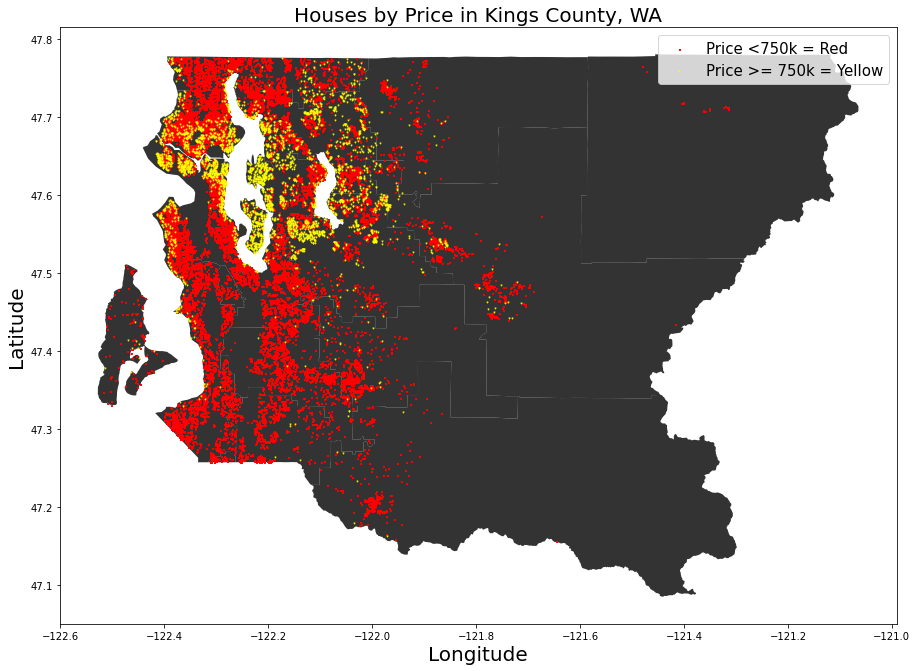

In [17]:
fig, ax = plt.subplots(figsize = (15,25))
kings_county.plot(ax=ax, alpha = 0.8, color = 'black')
geo_df[geo_df['price'] < 750000].plot(ax = ax , markersize = 1,
                                      color = 'red',marker = 's',
                                      label = 'Price <750k = Red', aspect = 1.5)
geo_df[geo_df['price'] >= 750000].plot(ax = ax , markersize = 1,
                                       color = 'yellow',marker = 'v',
                                       label = 'Price >= 750k = Yellow',aspect = 1.5)
plt.legend(prop = {'size':15})
ax.set_title('Houses by Price in Kings County, WA', fontdict = {'fontsize': 20})
ax.set_ylabel('Latitude',fontdict = {'fontsize': 20})
ax.set_xlabel('Longitude',fontdict = {'fontsize': 20})